In [1]:
import sys
sys.path.append('gym-unbalanced-disk/gym_unbalanced_disk/')
import gym, gym_unbalanced_disk, time
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [2]:
target_angle=np.pi
# angle_reward = lambda self: ((np.cos(self.th-target_angle)+1.5)**2 - 0.25)
# correctVelocity_reward = lambda self: 0.00125*(((np.cos(self.th)+1)/2)*(self.omega)**2)
# voltage_penalty = lambda self: -0.01*((self.u)**2)
# incorrectAngle_penalty = lambda self: -1*np.abs(self.th-target_angle)*np.abs(self.th+target_angle) #EXPERIMENTEEL

angle_reward = lambda self: ((np.cos(self.th-target_angle))**2)
Velocity_reward = lambda self: (((np.cos(self.th)+1)/2)*(self.omega)**2)

reward_function = lambda self: angle_reward(self) + Velocity_reward(self)

In [3]:
max_episode_steps = 300
env = gym.make('unbalanced-disk-sincos-v0', dt=0.025, umax=3.)
env = gym.wrappers.time_limit.TimeLimit(env,max_episode_steps=max_episode_steps)
env.change_reward_function(reward_function)
env.set_discrete_values(discrete_size = 5, minmax = 3.0, div = 3/0.9, rnd = 2)

Running from folder
Discrete value set changed to [-3.0, -0.9, 0, 0.9, 3.0]


In [4]:
u_list=[-3]*12+[3]*10+[0]+[-0.9]*3+[0]*100  # sim
# ulist=[-3]*10+[3]*10+[1.5]*3+[-1]*5+[0]*10 # irl

#change ulist to discrete just to test
u_list=[0]*12+[4]*10+[2]+[1]*3+[2]*100

In [5]:
try:
    obs = env.reset() #b)
    env.render() #b)
    time.sleep(1) #b)\
    u = []
    theta = []
    omega = []
    rewards = []
    cum_reward = []
    
    for i in u_list: #b)
        action = i #b)
        obs, reward, done, info = env.step(action) #b)
        time.sleep(1/60) #b)
        env.render() #b)

        u.append(env.u)
        theta.append(env.th)
        omega.append(env.omega)
        rewards.append(reward)
        cum_reward.append(np.sum(rewards))
        
finally: #this will always run even when an error occurs
    env.close()

pygame 2.4.0 (SDL 2.26.4, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:
try:
    obs = env.reset() #b)
    env.render() #b)
    time.sleep(1) #b)\
    u_random = []
    theta_random = []
    omega_random = []
    rewards_random = []
    cum_reward_random = []
    
    for i in u_list: #b)
        action =  env.action_space.sample() #b)
        obs, reward, done, info = env.step(action) #b)
#         time.sleep(1/60) #b)
        env.render() #b)

        u_random.append(env.u)
        theta_random.append(env.th)
        omega_random.append(env.omega)
        rewards_random.append(reward)
        cum_reward_random.append(np.sum(rewards_random))
        
finally: #this will always run even when an error occurs
    env.close()

In [7]:
try:
    obs = env.reset() #b)
    env.render() #b)
    time.sleep(1) #b)\
    u_no_action = []
    theta_no_action = []
    omega_no_action = []
    rewards_no_action = []
    cum_reward_no_action = []
    
    for i in u_list: #b)
        action = 2 #b)
        obs, reward, done, info = env.step(action) #b)
#         time.sleep(1/60) #b)
        env.render() #b)

        u_no_action.append(env.u)
        theta_no_action.append(env.th)
        omega_no_action.append(env.omega)
        rewards_no_action.append(reward)
        cum_reward_no_action.append(np.sum(rewards_no_action))
        
finally: #this will always run even when an error occurs
    env.close()

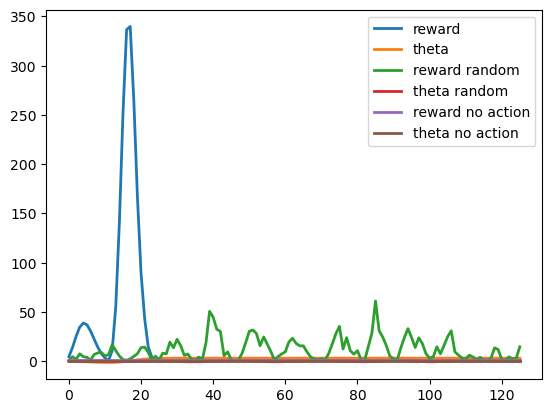

In [8]:
plt.plot(rewards, linewidth=2, label='reward')
plt.plot(theta, linewidth=2, label='theta')
plt.plot(rewards_random, linewidth=2, label='reward random')
plt.plot(theta_random, linewidth=2, label='theta random')
plt.plot(rewards_no_action, linewidth=2, label='reward no action')
plt.plot(theta_no_action, linewidth=2, label='theta no action')
plt.legend()
plt.show()

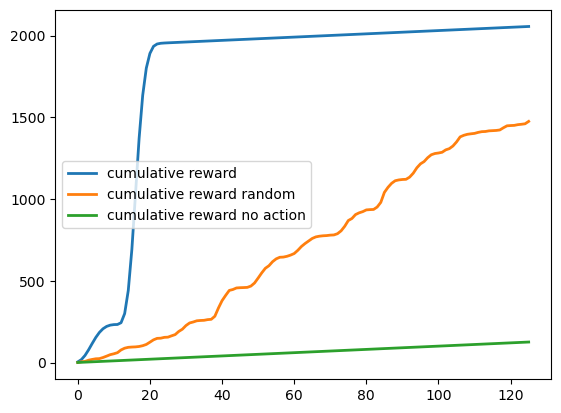

In [9]:
plt.plot(cum_reward, linewidth=2, label='cumulative reward')
plt.plot(cum_reward_random, linewidth=2, label='cumulative reward random')
plt.plot(cum_reward_no_action, linewidth=2, label='cumulative reward no action')
plt.legend()
plt.show()